# Wine Quality Analysis

The database was taked from the link below:

[Data](https://www.kaggle.com/datasets/rajyellow46/wine-quality?resource=download)

###About Dataset
Data Set Information:

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Acknowledgements:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

The purpose of this analysis was guided by studies purposes for my postgraduation degree on Data Analytics.

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Reading the dataset
data = pd.read_csv('/content/winequality-red.txt', sep=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Getting columns info (like dtype) and searching for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Getting rid of duplicated rows
data = data.drop_duplicates()

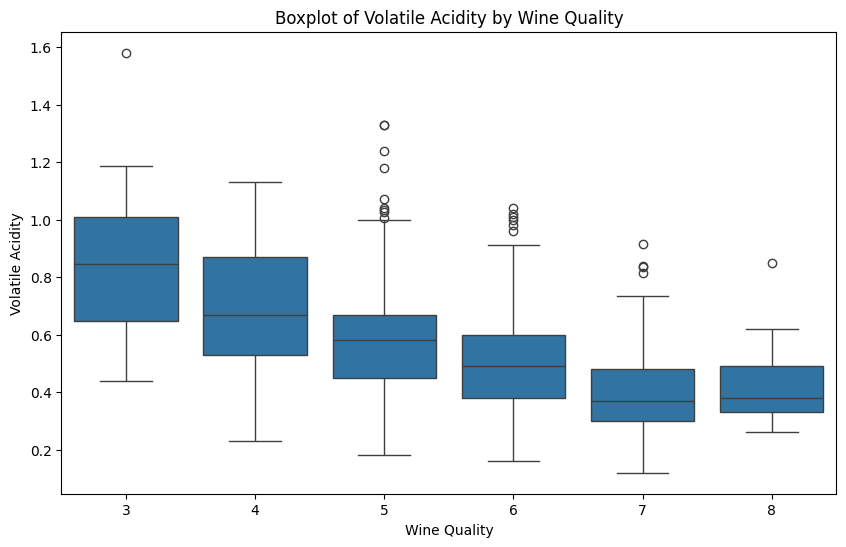

In [ ]:
# Showing the distribuition for 'quality' and 'volatile acidity'
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', data=data)
plt.title('Boxplot of Volatile Acidity by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')
plt.show()

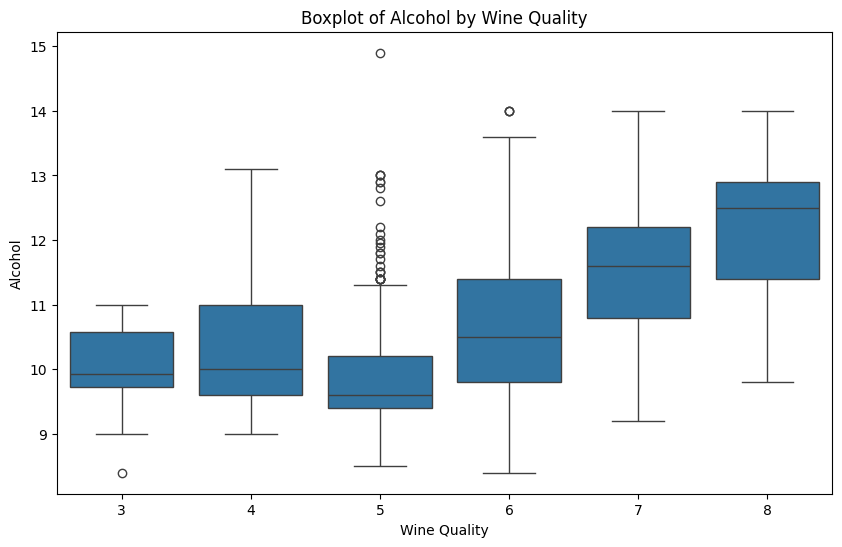

In [ ]:
# Showing the distribuition for 'quality' and 'alcohol'
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=data)
plt.title('Boxplot of Alcohol by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')
plt.show()

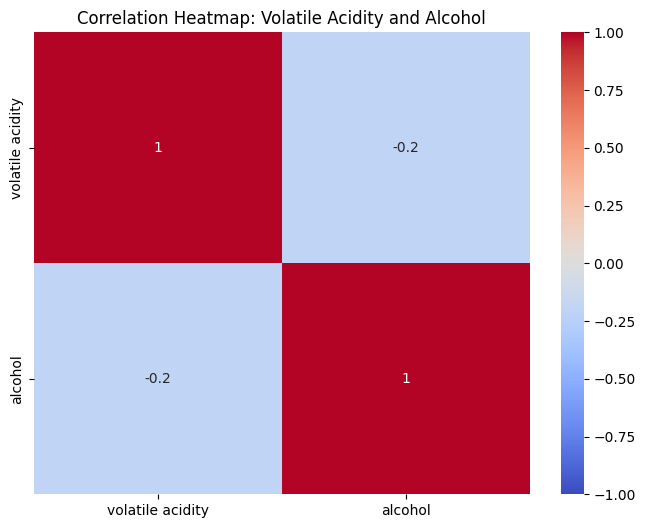

In [ ]:
# Trying to find correlation for 'volatile acidity' and 'alcohol'
# Select relevant columns
df_subset = data[['volatile acidity', 'alcohol']]

# Compute the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Volatile Acidity and Alcohol')
plt.show()

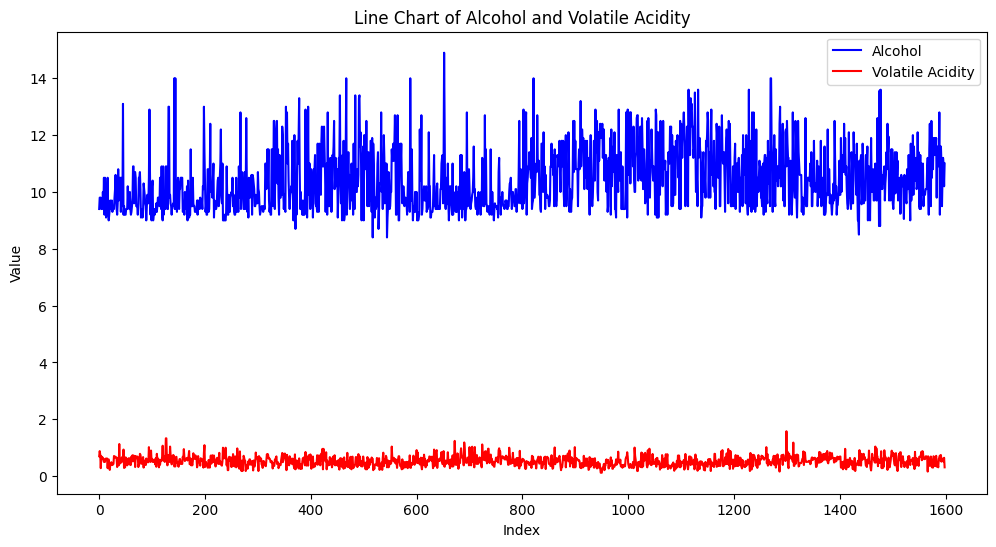

In [ ]:
# As the chart above is quite confusing, let's see with lines if there is any correlation
# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['alcohol'], label='Alcohol', color='b')
plt.plot(data.index, data['volatile acidity'], label='Volatile Acidity', color='r')
plt.title('Line Chart of Alcohol and Volatile Acidity')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

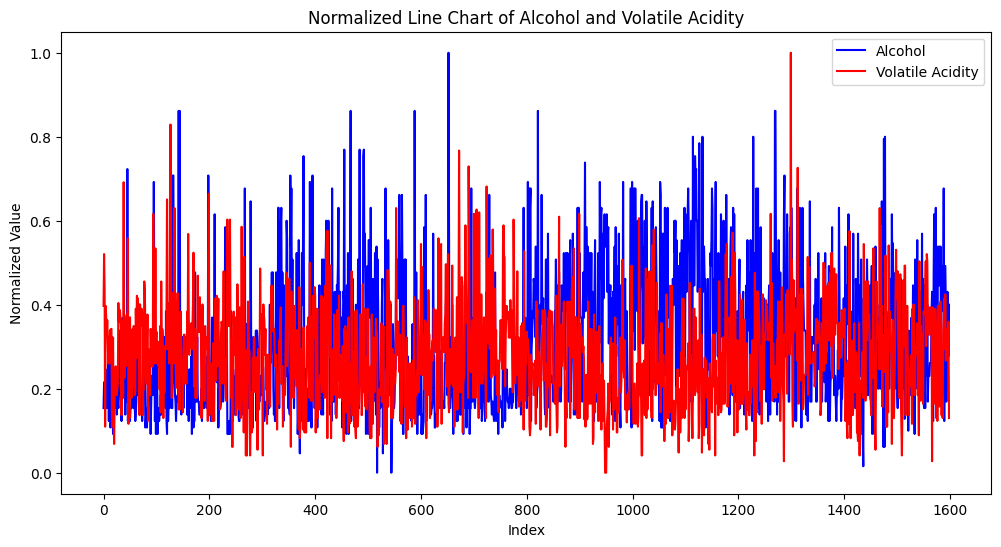

In [ ]:
# The chart above didn't show a good way to vizualize the correlation as well, se let's normalize and plot again

from sklearn.preprocessing import MinMaxScaler
# Select the columns to normalize
columns_to_normalize = ['alcohol', 'volatile acidity']

# Normalize the selected columns
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Plot the normalized line chart
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['alcohol'], label='Alcohol', color='b')
plt.plot(data.index, data['volatile acidity'], label='Volatile Acidity', color='r')
plt.title('Normalized Line Chart of Alcohol and Volatile Acidity')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

We can see that we cannot see any kind of correlation for volatile acidity and alcohol

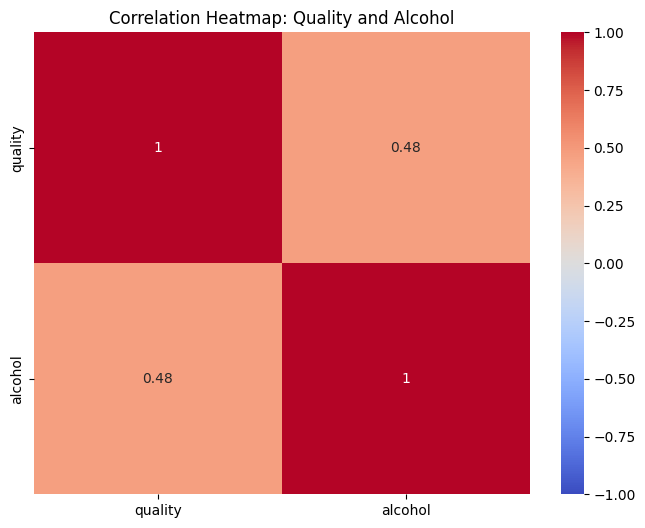

In [ ]:
# Trying to find correlation for 'quality' and 'alcohol'
# Select relevant columns
df_subset = data[['quality', 'alcohol']]

# Compute the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Quality and Alcohol')
plt.show()

It seems to have correlation because the number 0.48 is close to 1

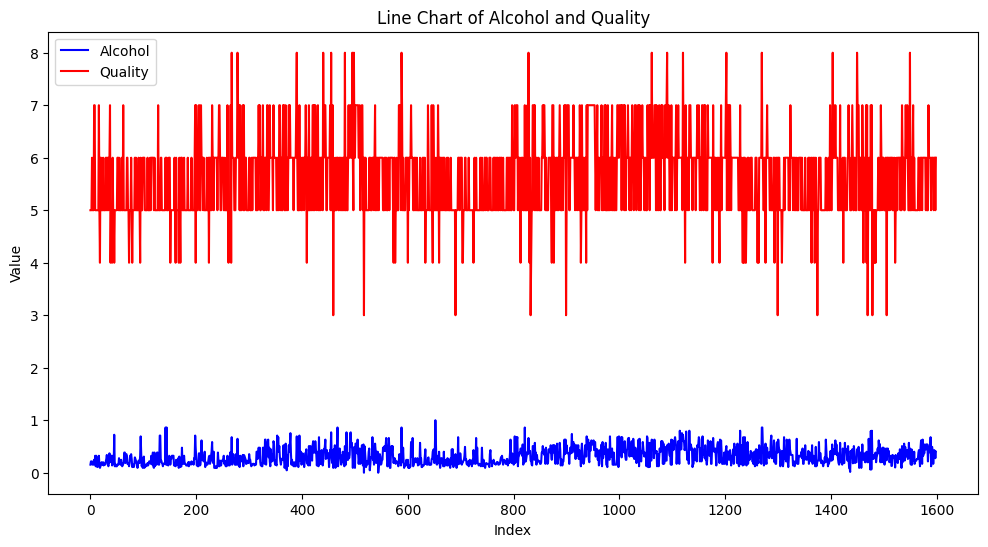

In [ ]:
# As the chart above is quite confusing, let's see with lines if there is any correlation
# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['alcohol'], label='Alcohol', color='b')
plt.plot(data.index, data['quality'], label='Quality', color='r')
plt.title('Line Chart of Alcohol and Quality')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

The visualition is not good because quality is categorical and alcohol numeric

In [ ]:
# Mean of the valotalite acidity on high quality wines
high_quality = data[data['quality'] > 6]
high_quality['volatile acidity'].mean()

0.19580107206670636

In [ ]:
# Correlation of alcohol and wine quality
df_subset.corr()

# It seems to have a correlation

,quality,alcohol
quality,1.000000,0.480343
alcohol,0.480343,1.000000


In [ ]:
# Correlation of volatile acidity and alcohol
# Select relevant columns
df_subset = data[['volatile acidity', 'alcohol']]

df_subset.corr()
# # It doesn't seem to have a correlation

,volatile acidity,alcohol
volatile acidity,1.000000,-0.197812
alcohol,-0.197812,1.000000


In [ ]:
# Correlation of volatile acidity and quality
# Select relevant columns
df_subset = data[['volatile acidity', 'quality']]

df_subset.corr()
# # It doesn't seem to have a correlation

,volatile acidity,quality
volatile acidity,1.000000,-0.395214
quality,-0.395214,1.000000
